# 112-1 ML_Final presentation
* Group 3
* Member: 邱寶樟(26)、侯亮羽(14)、李奕呈(18)
* Kaggle: Titanic <br>
    * https://www.kaggle.com/competitions/titanic

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 1. 引入資料、觀察數值

* 特徵名稱說明
|  ||  ||  ||  ||  ||  |
|---|---|---|---|---|---|---|---|---|---|---|
|PassengerId：乘客代碼||Survived：生存||Pclass：票價等級||Name：姓名||Sex：性別||Age：年齡|
|SibSp：配偶、親屬||Parch：家長、小孩||Ticket：票號||Fare：票價||Cabin：座艙號碼||Embarked*：登船點

*Embarked: C = Cherbourg, Q = Queenstown, S = Southampton|

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

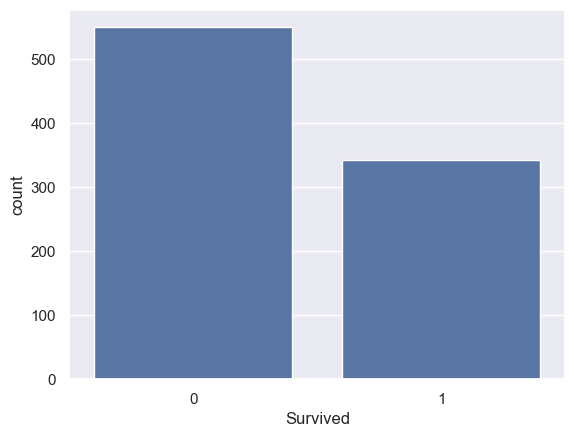

In [4]:
print(data['Survived'].value_counts())
sns.set_theme()
sns.countplot(data, x='Survived')

,Sex,Survived
0,female,0.742
1,male,0.189


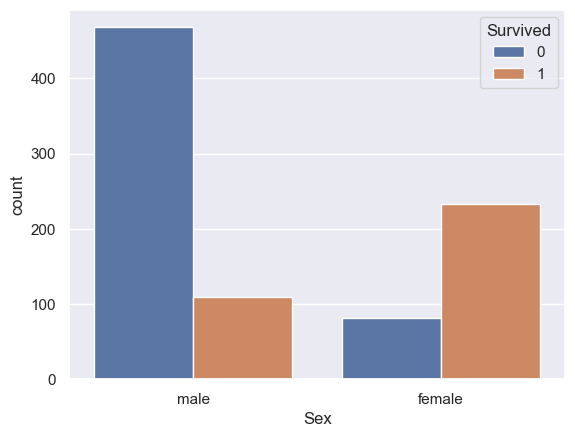

In [5]:
sns.countplot(data, x='Sex', hue='Survived')
display(data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().round(3))

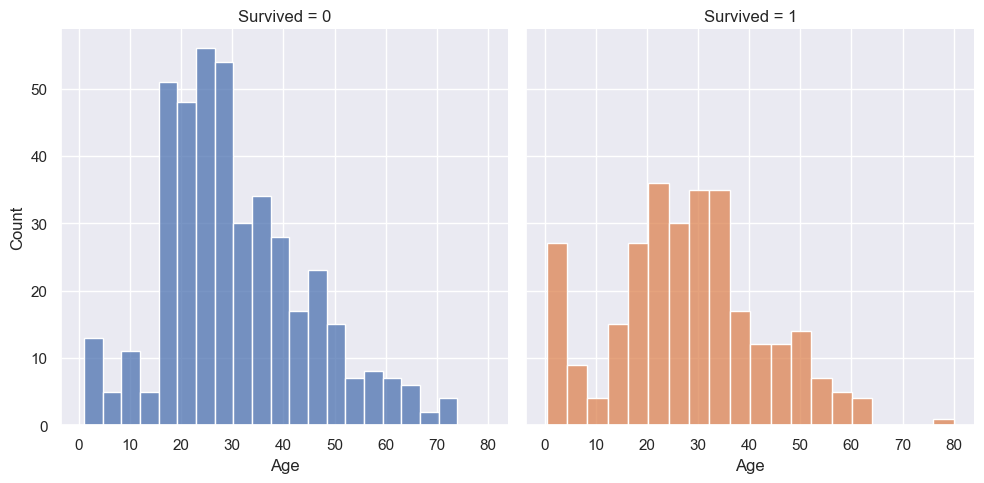

In [6]:
age_survied = sns.FacetGrid(data, col='Survived', hue='Survived', height=5, aspect=1)
age_survied.map(sns.histplot, 'Age', bins=20, kde=False)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


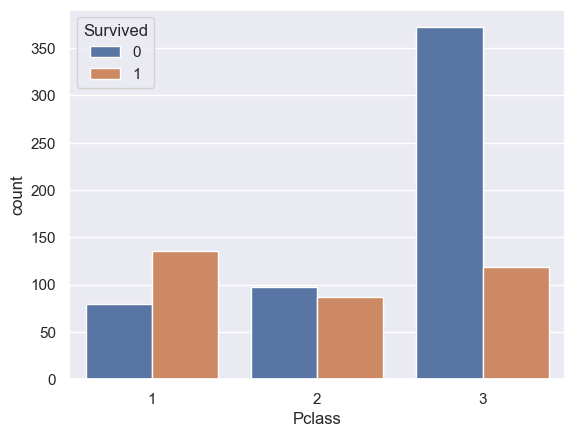

In [7]:
sns.countplot(data, x='Pclass', hue='Survived')
display(data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().round(3))

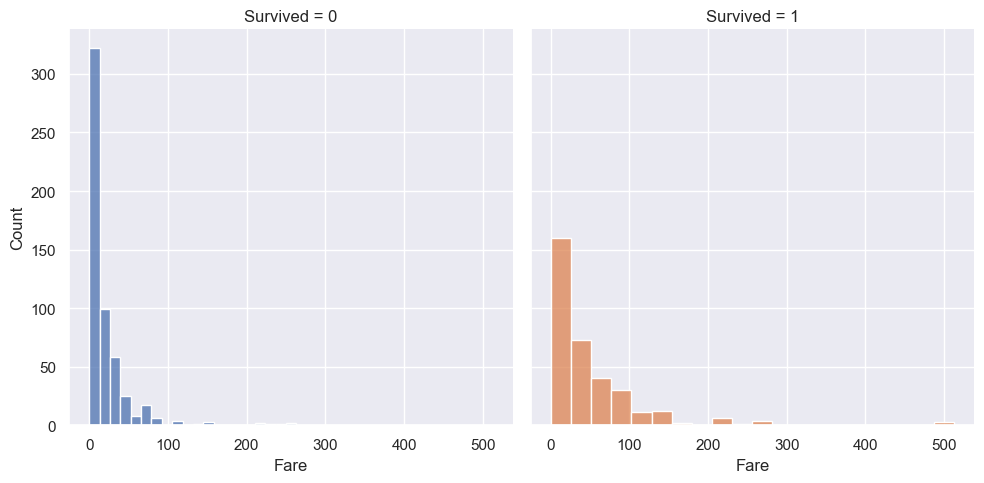

In [8]:
fare_survied = sns.FacetGrid(data, col='Survived', hue='Survived', height=5, aspect=1)
fare_survied.map(sns.histplot, 'Fare', bins=20, kde=False)

,SibSp,Survived
0,0,0.345
1,1,0.536
2,2,0.464
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


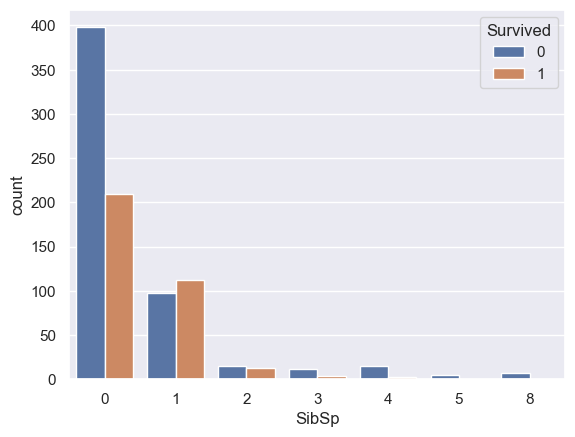

In [9]:
sns.countplot(data, x='SibSp', hue='Survived')
display(data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().round(3))

,Parch,Survived
0,0,0.344
1,1,0.551
2,2,0.500
3,3,0.600
4,4,0.000
5,5,0.200
6,6,0.000


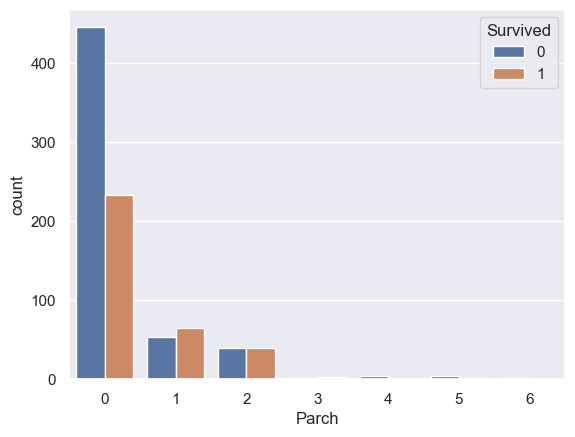

In [10]:
sns.countplot(data, x='Parch', hue='Survived')
display(data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().round(3))

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


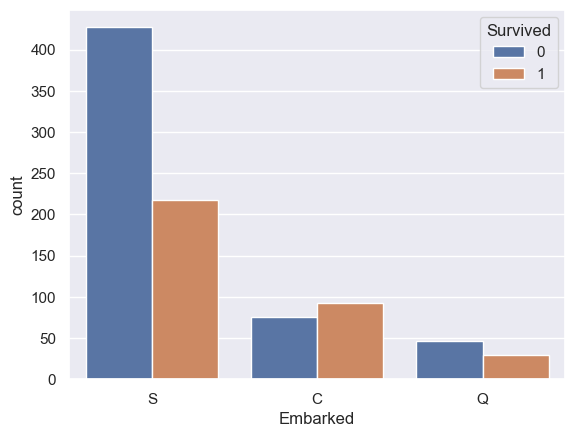

In [11]:
sns.countplot(data, x='Embarked', hue='Survived')
display(data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().round(3))

### 2. 資料預處理

#### a. 丟棄不必要的資料

In [12]:
dropped_data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
dropped_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### b. 填補資料
* 數值資料：以「中位數」取代
* 類別資料：以「眾數」取代

In [14]:
dropped_data['Age'] = dropped_data['Age'].fillna(dropped_data['Age'].median())
dropped_data['Embarked'] = dropped_data['Embarked'].fillna(dropped_data['Embarked'].mode().iloc[0])
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### c.處理類別資料
* 「類別」資料進行 One Hot Encoder

In [15]:
dropped_data = pd.get_dummies(dropped_data, drop_first=True).astype('float64')
dropped_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0


#### d.尋找相關性

In [16]:
dropped_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

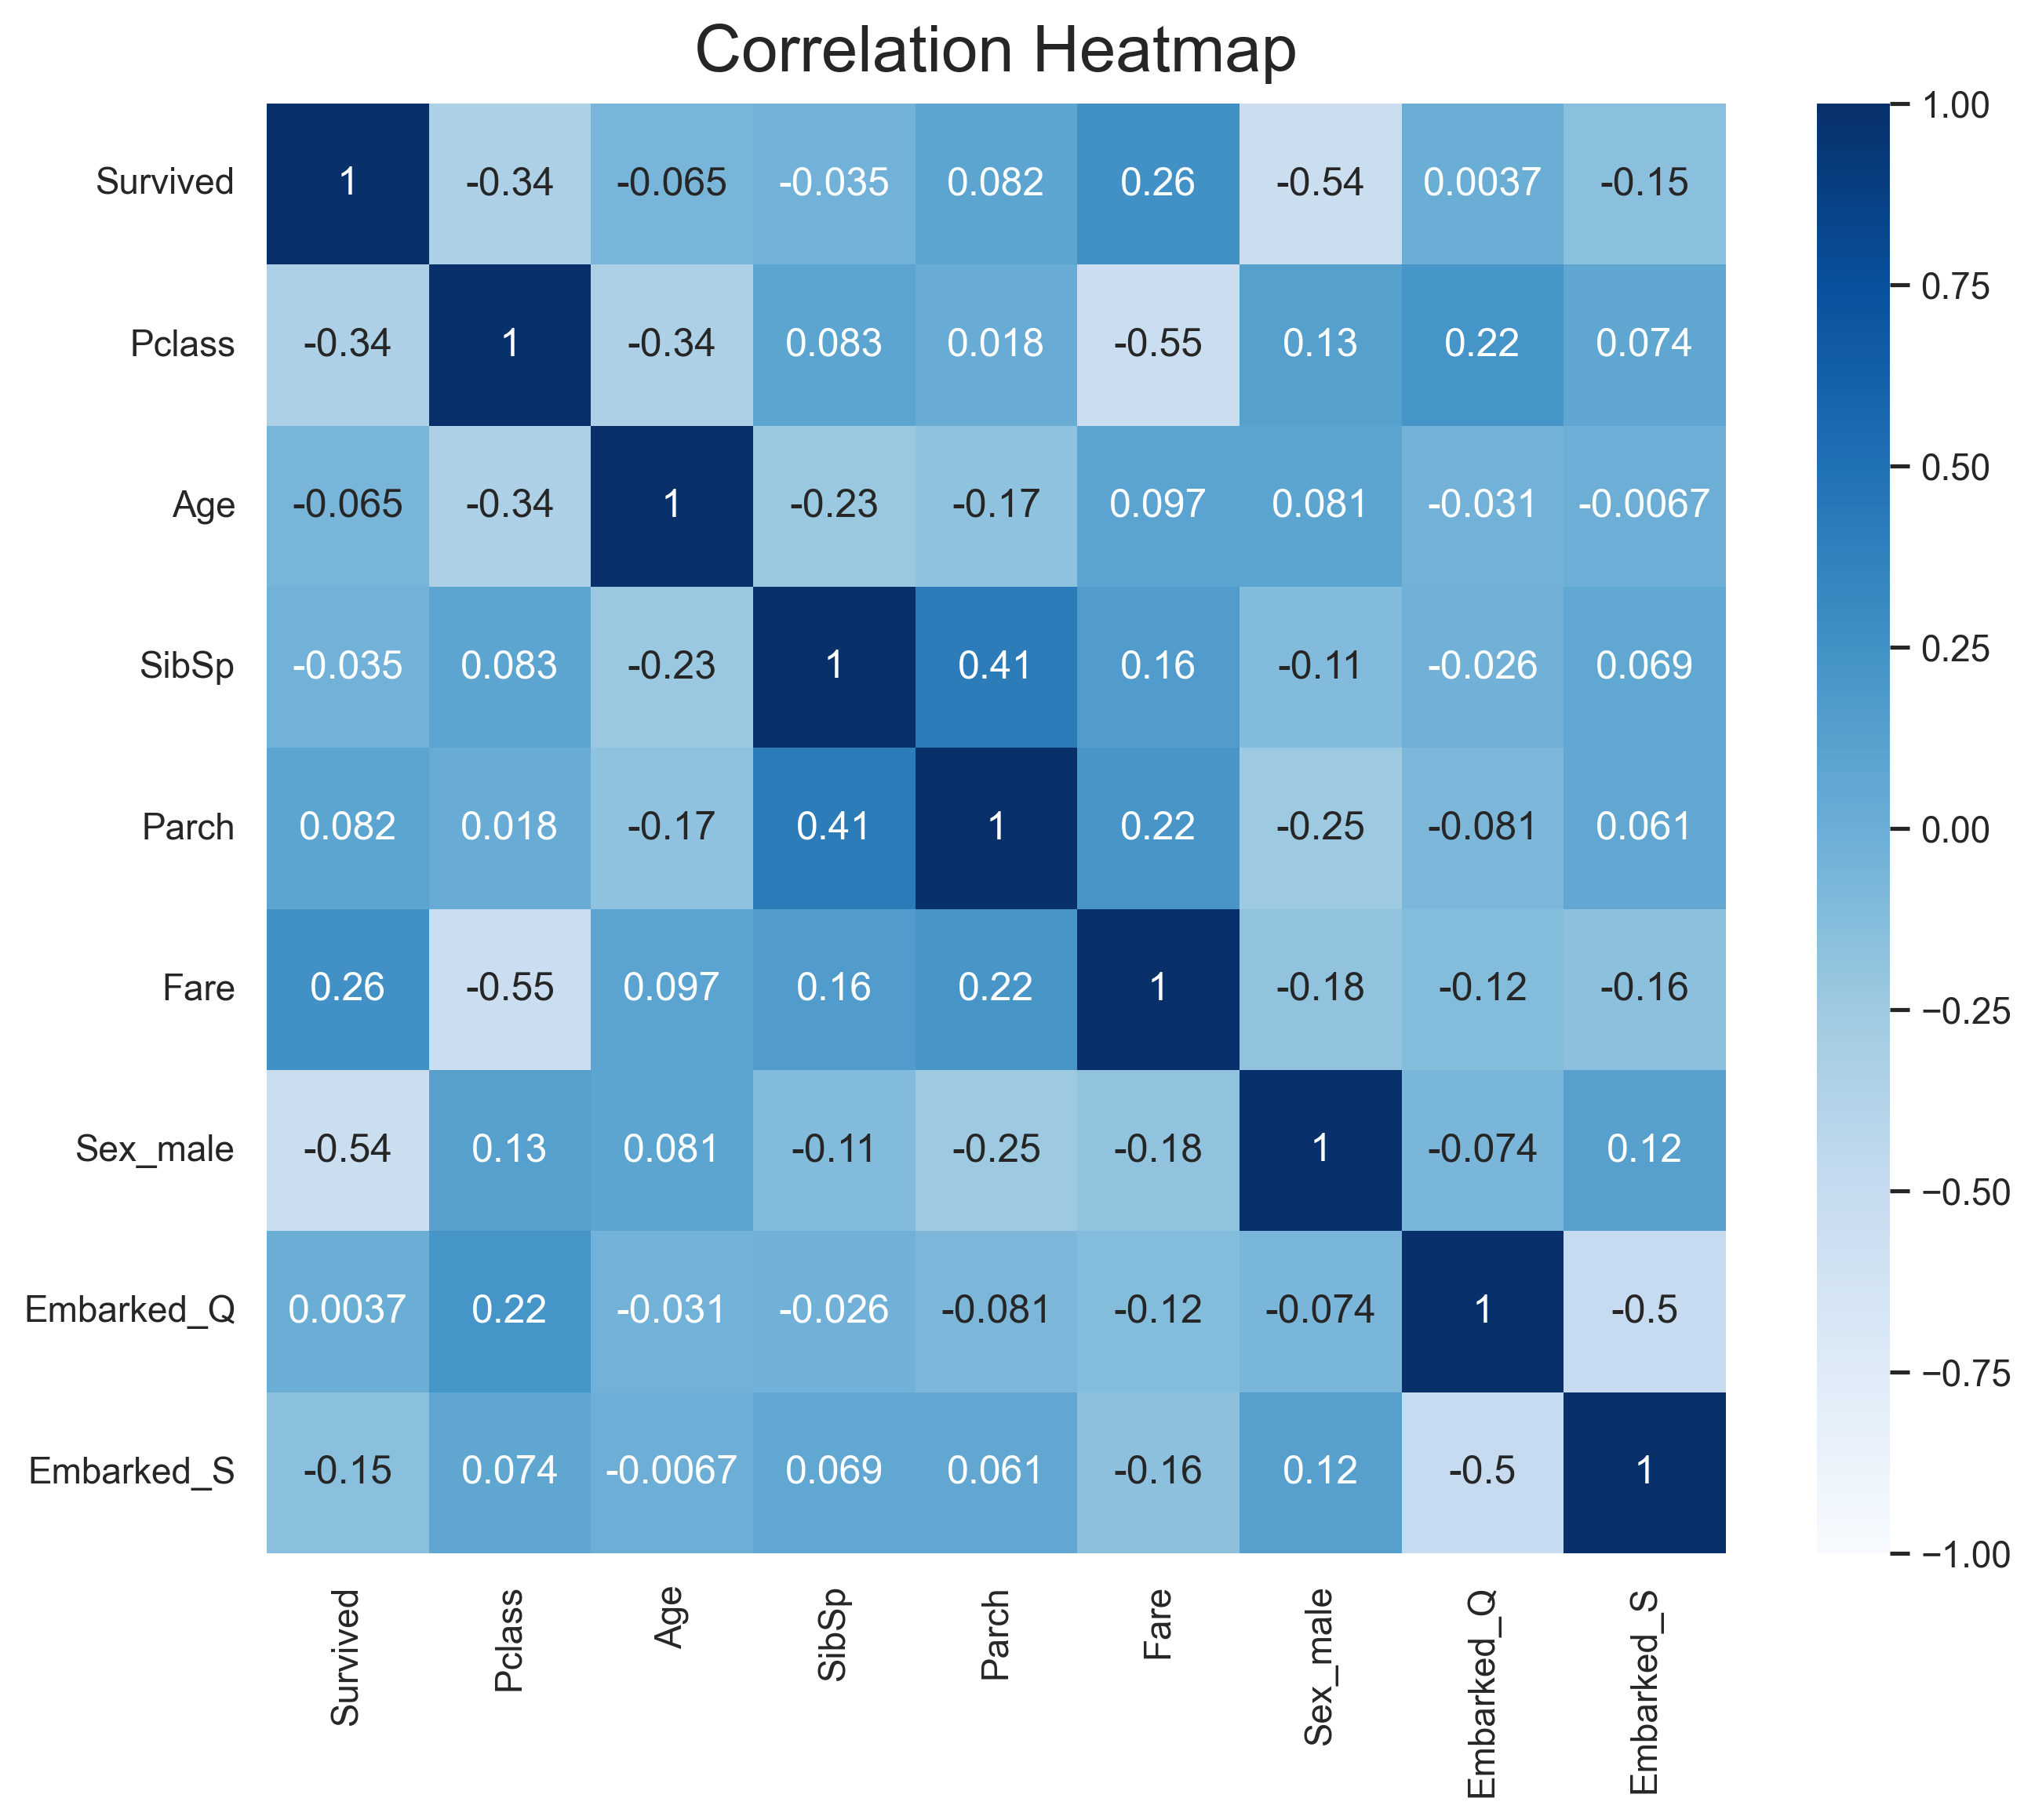

In [17]:
plt.figure(figsize=(10, 8), dpi=300)
heatmap = sns.heatmap(dropped_data.corr(), vmin=-1, vmax=1, annot=True,cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10)

#### e. 資料標準化

In [18]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X_scaled = ss.fit_transform(dropped_data.iloc[:, 1:])
pd.DataFrame(X_scaled, columns = dropped_data.columns[ 1 :])

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


#### f. 分層取樣訓練與測試資料

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, dropped_data.iloc[:, 0], test_size=0.2, 
                                                    random_state=42, stratify=dropped_data.iloc[:, 0])

In [20]:
print('y_train data: ', y_train.value_counts(normalize=True))
print('\n\ny_test data: ', y_test.value_counts(normalize=True))

y_train data:  Survived
0.0    0.616573
1.0    0.383427
Name: proportion, dtype: float64


y_test data:  Survived
0.0    0.614525
1.0    0.385475
Name: proportion, dtype: float64


### 3. 訓練與預測模型

#### a. Logistic regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

##### (1) 未調整參數

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print('Logistic regression training score: %.3f' % log_reg.score(X_train, y_train))
print('Logistic regression testing score: %.3f' % log_reg.score(X_test, y_test))

Logistic regression training score: 0.801
Logistic regression testing score: 0.793


##### (2) 調整參數

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'C':[0.01, 0.1, 1, 10, 100],
}

log_reg = LogisticRegression(random_state=42)
log_grid_search_cv = GridSearchCV(log_reg, params, n_jobs=-1, verbose=1, cv=10)
log_grid_search_cv.fit(X_train, y_train)
print(log_grid_search_cv.best_params_)
print('Logistic regression training score: %.3f' % log_grid_search_cv.score(X_train, y_train))
print('Logistic regression testing score: %.3f' % log_grid_search_cv.score(X_test, y_test))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 1}
Logistic regression training score: 0.801
Logistic regression testing score: 0.793


#### b. Decision tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

##### (1) 未調整參數前 Overfitting

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print('Decision Tree training score: %.3f' % tree_clf.score(X_train, y_train))
print('Decision Tree testing score: %.3f' % tree_clf.score(X_test, y_test))

Decision Tree training score: 0.982
Decision Tree testing score: 0.821


##### (2) 逐漸縮小超參數搜尋範圍

* find the optimal `max_depth`

max_depth, cross_val_score: [10.          0.78945618]


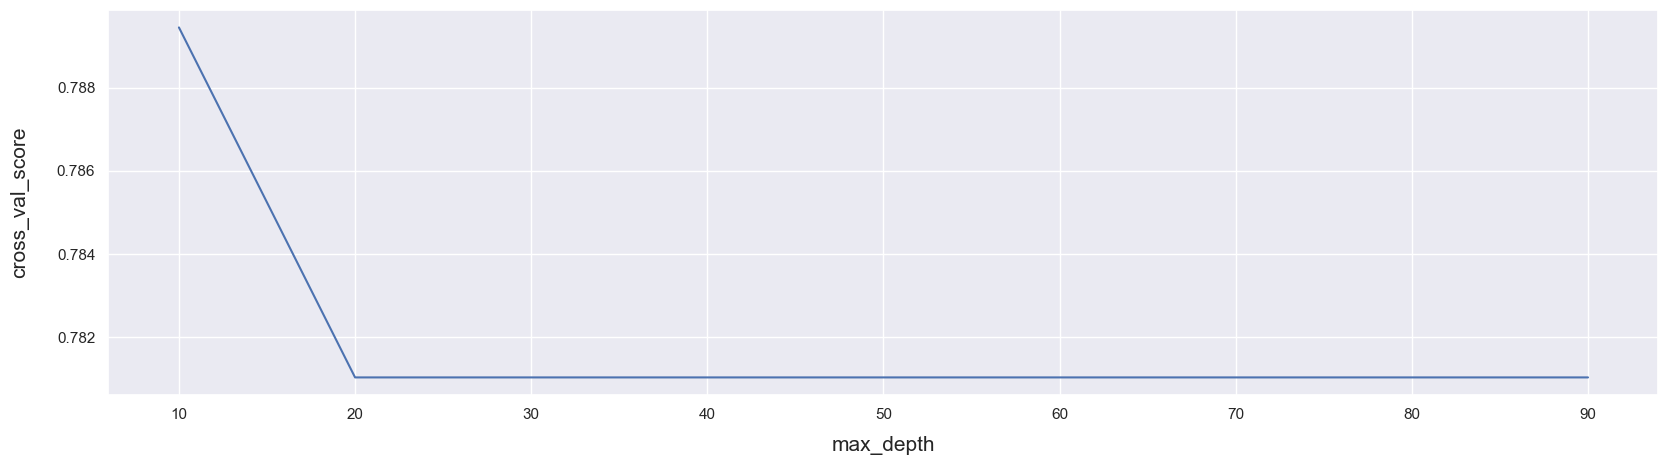

In [24]:
from sklearn.model_selection import cross_val_score

all_score = []
for i in range(10,100,10):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    score = cross_val_score(tree_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("max_depth, cross_val_score:",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('max_depth', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

max_depth, cross_val_score: [4.         0.81459311]


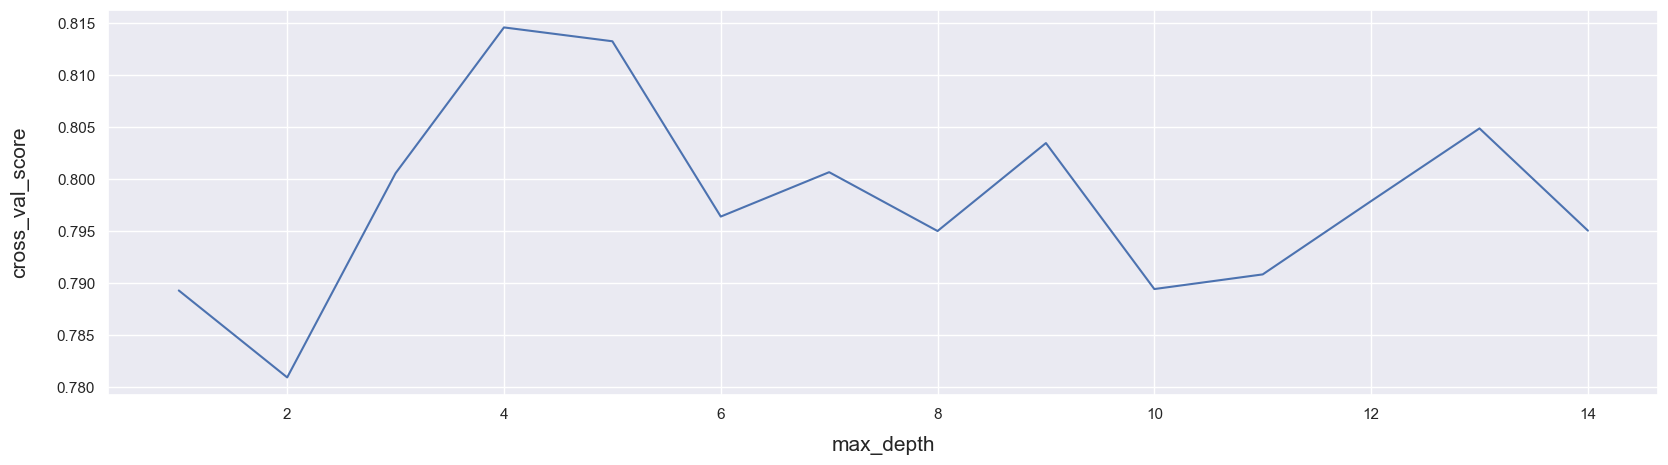

In [25]:
all_score = []
for i in range(1, 15, 1):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    score = cross_val_score(tree_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("max_depth, cross_val_score:",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('max_depth', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

* find the optimal `min_samples_split`

min_samples_split, cross_val_score  [2.         0.81459311]


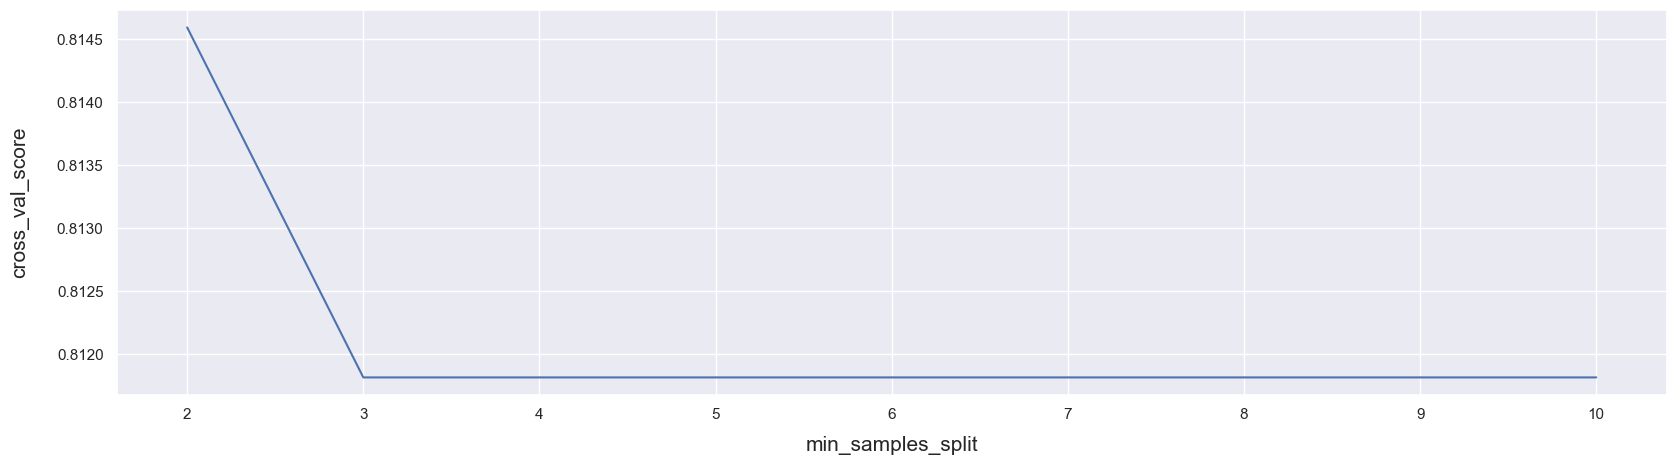

In [26]:
all_score = []
for i in range(2, 11, 1):
    tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_split=i,random_state=42)
    score = cross_val_score(tree_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_split, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_split', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

* find the optimal `min_samples_leaf`

min_samples_leaf, cross_val_score  [4.         0.81596244]


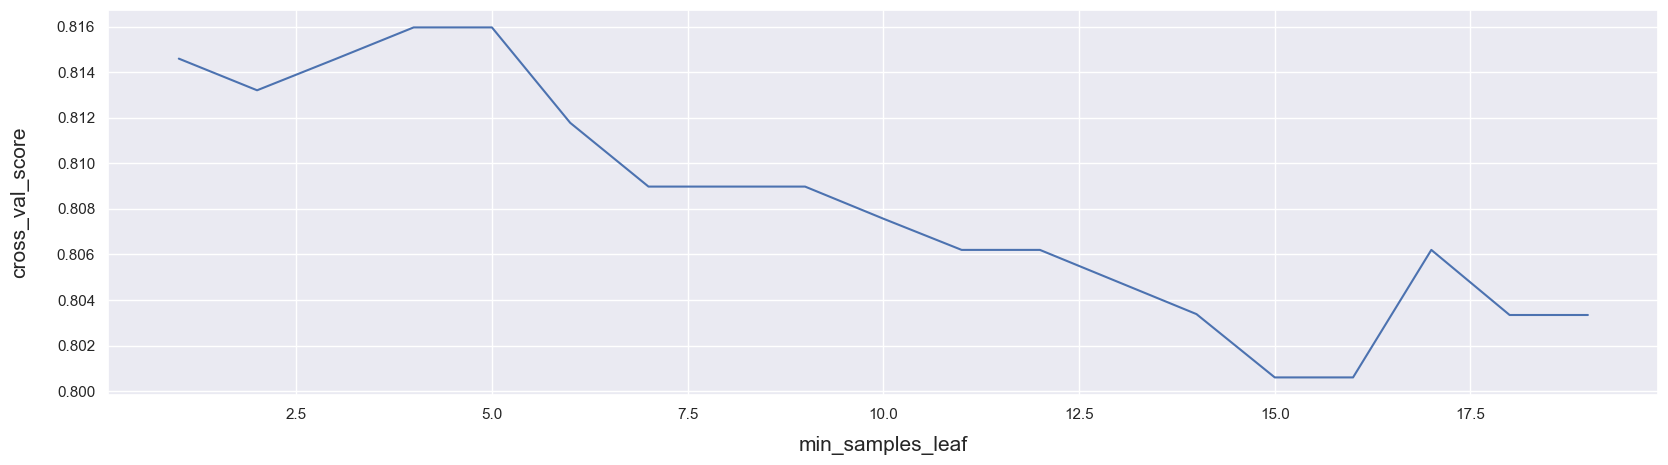

In [27]:
all_score = []
for i in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=i,random_state=42)
    score = cross_val_score(tree_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_leaf, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_leaf', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

##### (3) 在縮小的搜尋範圍內以 `GridSearchCV`找尋最佳參數

In [28]:
params = {
    'max_depth':np.arange(3, 6),
    'min_samples_split':np.arange(2, 5),
    'min_samples_leaf':np.arange(2, 6),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_grid_search_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=10, scoring='roc_auc')
tree_grid_search_cv.fit(X_train, y_train)
print(tree_grid_search_cv.best_params_)
print('Decision Tree training score: %.3f' % tree_grid_search_cv.score(X_train, y_train))
print('Decision Tree testing score: %.3f' % tree_grid_search_cv.score(X_test, y_test))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree training score: 0.888
Decision Tree testing score: 0.818


#### c. Random Forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

##### (1) 未調整參數前 Overfitting

In [29]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)
print('Random Forest training score: %.3f' % rnd_clf.score(X_train, y_train))
print('Random Forest testing score: %.3f' % rnd_clf.score(X_test, y_test))

Random Forest training score: 0.982
Random Forest testing score: 0.816


* find the optimal `max_depth`

max_depth, cross_val_score: [10.          0.82169405]


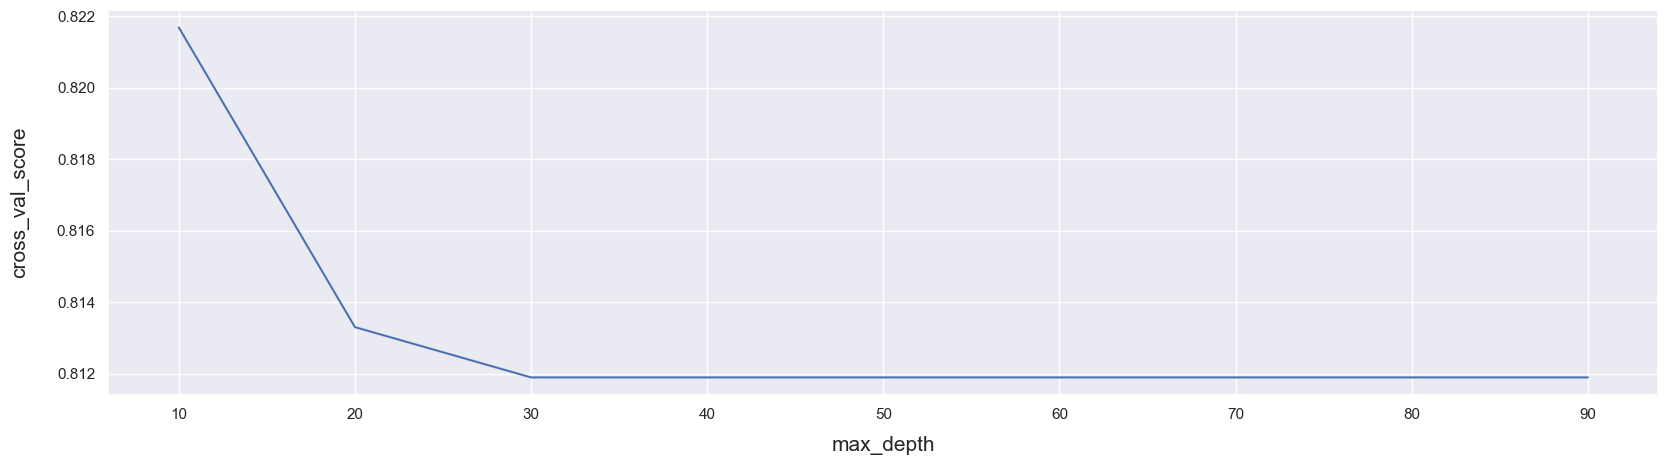

In [30]:
all_score = []
for i in range(10,100,10):
    rnd_clf = RandomForestClassifier(max_depth=i, random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("max_depth, cross_val_score:",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('max_depth', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

max_depth, cross_val_score: [4.         0.84137324]


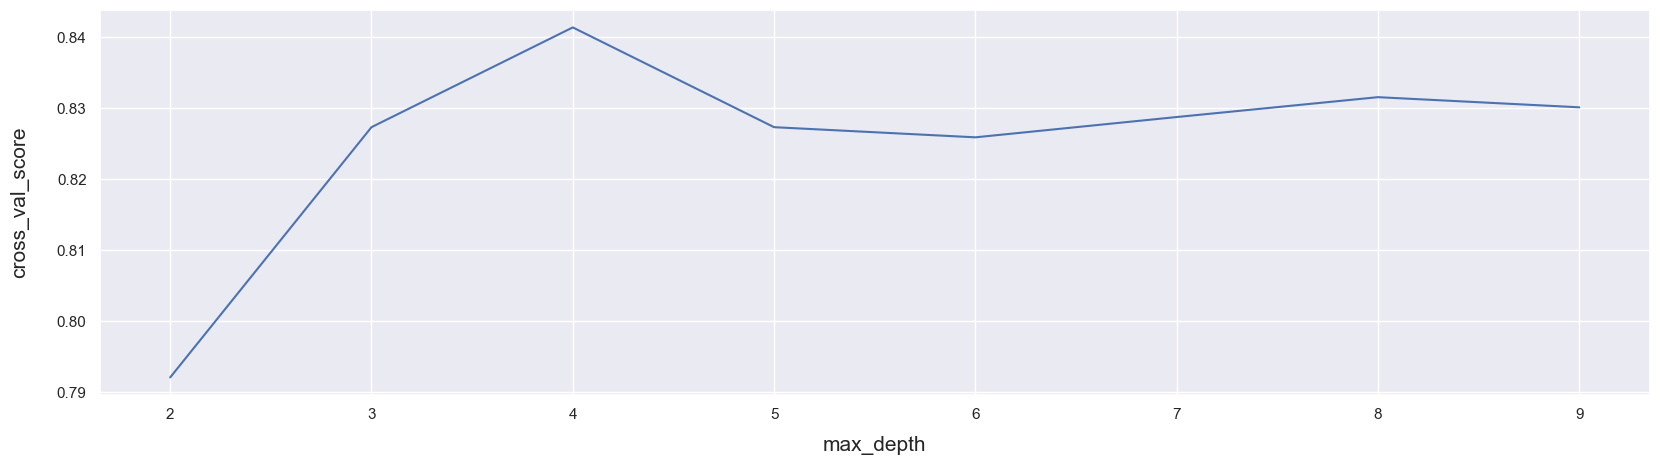

In [31]:
all_score = []
for i in range(2,10):
    rnd_clf = RandomForestClassifier(max_depth=i, random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("max_depth, cross_val_score:",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('max_depth', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

* find the optimal `min_samples_split`

min_samples_split, cross_val_score  [10.          0.83296166]


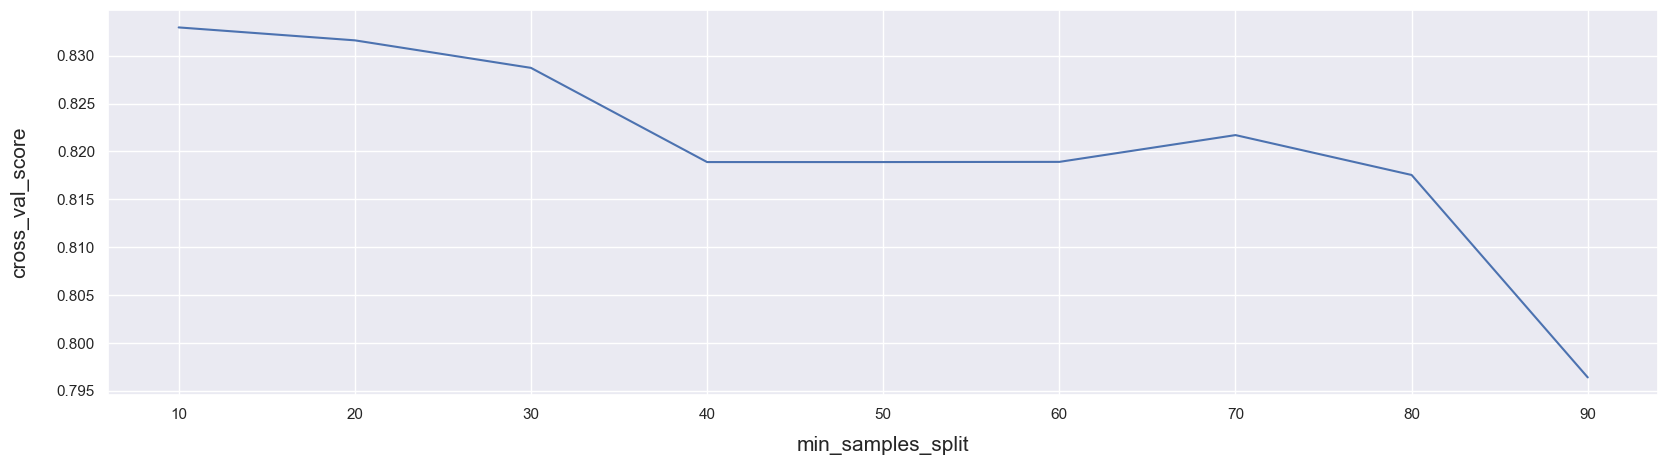

In [32]:
all_score = []
for i in range(10, 100, 10):
    rnd_clf = RandomForestClassifier(max_depth=4, min_samples_split=i,random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_split, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_split', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

min_samples_split, cross_val_score  [2.         0.84137324]


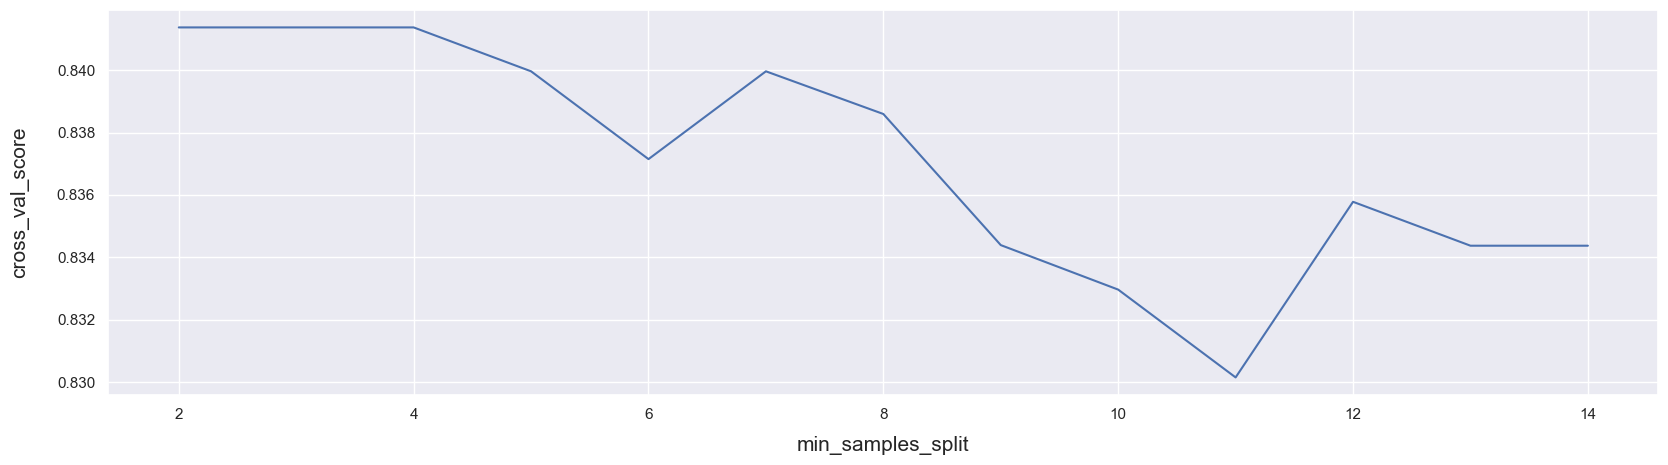

In [33]:
all_score = []
for i in range(2, 15):
    rnd_clf = RandomForestClassifier(max_depth=4, min_samples_split=i,random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_split, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_split', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

* find the optimal `min_samples_leaf`

min_samples_leaf, cross_val_score  [10.          0.82451095]


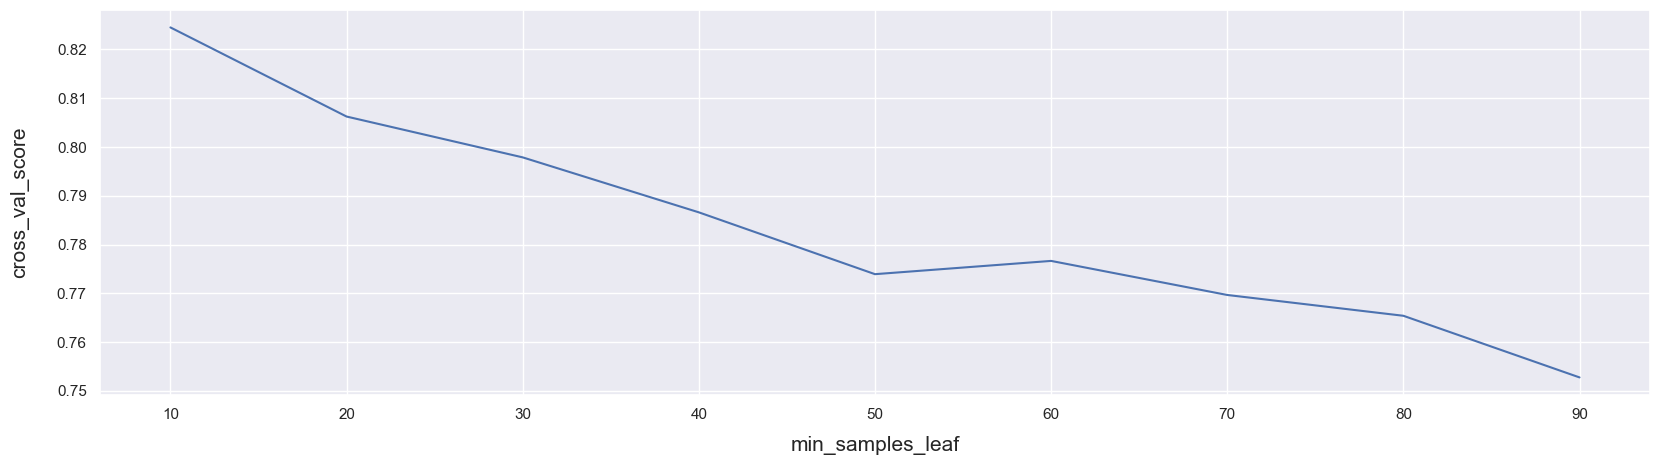

In [34]:
all_score = []
for i in range(10,100, 10):
    rnd_clf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=i,random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_leaf, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_leaf', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

min_samples_leaf, cross_val_score  [1.       0.835759]


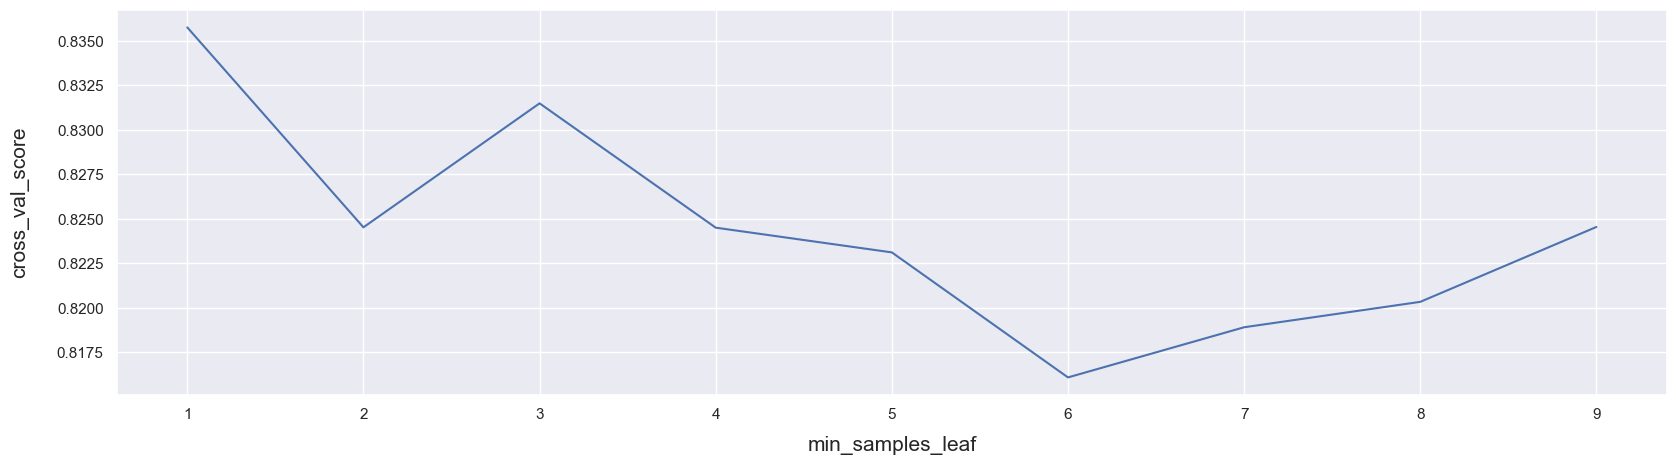

In [35]:
all_score = []
for i in range(1,10):
    rnd_clf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=i,random_state=42)
    score = cross_val_score(rnd_clf, X_train, y_train, cv=10).mean()
    all_score.append([i,score])
all_score = np.array(all_score)

max_score = np.where(all_score==np.max(all_score[:,1]))[0][0]
print("min_samples_leaf, cross_val_score ",all_score[max_score])  
plt.figure(figsize=[20,5])
plt.plot(all_score[:,0],all_score[:,1])
plt.xlabel('min_samples_leaf', fontsize=15, labelpad=10)
plt.ylabel('cross_val_score', fontsize=15, labelpad=20)
plt.show()

##### (3) 在縮小的搜尋範圍內以  `GridSearchCV` 找尋最佳參數

In [36]:
params = {
    'max_depth':np.arange(3, 6),
    'min_samples_split':np.arange(2, 5),
    'min_samples_leaf':np.arange(1, 3),
}

rnd_clf = RandomForestClassifier(random_state=42)
rnd_grid_search_cv = GridSearchCV(rnd_clf, params, n_jobs=-1, verbose=1, cv=10, scoring='roc_auc')
rnd_grid_search_cv.fit(X_train, y_train)
print(rnd_grid_search_cv.best_params_)
print('Random Forest training score: %.3f' % rnd_grid_search_cv.score(X_train, y_train))
print('Random Forest testing score: %.3f' % rnd_grid_search_cv.score(X_test, y_test))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Random Forest training score: 0.912
Random Forest testing score: 0.841


#### d. XGboost
* https://xgboost.readthedocs.io/en/stable/python/python_intro.html

##### (1) 未調整參數前 Overfitting

In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
print('XGBoost training score: %.3f' % xgb_clf.score(X_train, y_train))
print('XGBoost testing score: %.3f' % xgb_clf.score(X_test, y_test))


XGBoost training score: 0.971
XGBoost testing score: 0.827


##### (2) 以  `GridSearchCV` 找尋最佳參數

In [38]:
params = {
    'n_estimators': range(2, 11),
    'learning_rate': [.1, .2, .3],
    'colsample_bytree': [.6, .7, .8],
    'max_depth':range(2, 5),
    'subsample': [.7, .8, .9],
    'min_child_weight':range(1,3)
}

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_grid_search_cv = GridSearchCV(xgb_clf, params, n_jobs=-1, verbose=1, cv=10, scoring='roc_auc')
xgb_grid_search_cv.fit(X_train, y_train)
print(xgb_grid_search_cv.best_params_)
print('XGBoost training score: %.3f' % xgb_grid_search_cv.score(X_train, y_train))
print('XGBoost testing score: %.3f' % xgb_grid_search_cv.score(X_test, y_test))

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 8, 'subsample': 0.7}
XGBoost training score: 0.902
XGBoost testing score: 0.833


#### e. AdaBoost
* https://www.youtube.com/watch?v=2kzpdLGJ0Zk
* 12/24 updated: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

##### (1) 未調整參數前 Overfitting

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
print('AdaBoost training score: %.3f' % ada_clf.score(X_train, y_train))
print('AdaBoost testing score: %.3f' % ada_clf.score(X_test, y_test))

AdaBoost training score: 0.847
AdaBoost testing score: 0.765


##### (2) find the optimal  `n_estimators` 

n_estimators, cross_val_score: 90.0 0.8203247261345853


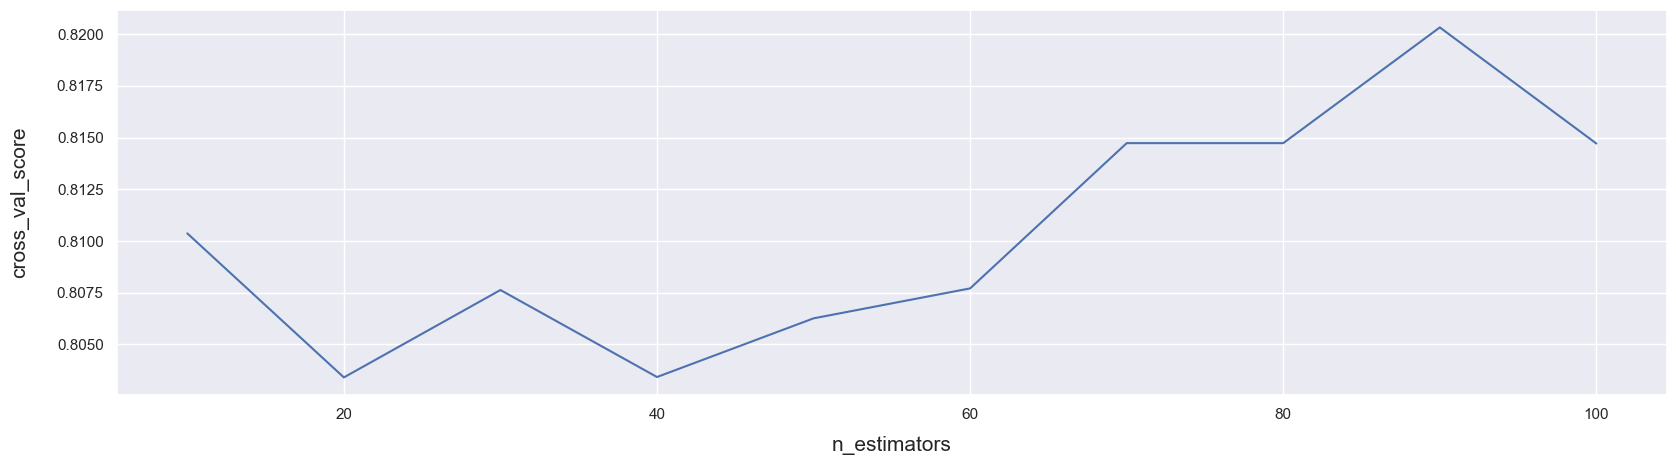

In [40]:
all_score = [] 
for i in range(10, 101, 10):     
    ada_clf = AdaBoostClassifier(n_estimators=i, random_state=42)     
    score = cross_val_score(ada_clf, X_train, y_train, cv=10).mean()     
    all_score.append([i, score]) 
all_score = np.array(all_score)
    
max_score_idx = np.argmax(all_score[:, 1]) 
best_n_estimators, best_score = all_score[max_score_idx]

print("n_estimators, cross_val_score:", best_n_estimators, best_score)
plt.figure(figsize=[20, 5]) 
plt.plot(all_score[:, 0], all_score[:, 1]) 
plt.xlabel('n_estimators', fontsize=15, labelpad=10) 
plt.ylabel('cross_val_score', fontsize=15, labelpad=20) 
plt.show()

##### (3) 在縮小的搜尋範圍內以  `GridSearchCV` 找尋最佳參數

In [41]:
params = {
    'n_estimators': range(80, 100),
    'learning_rate': [0.1, 0.2, 0.3]
}

ada_clf = AdaBoostClassifier(random_state=42)
ada_grid_search_cv = GridSearchCV(ada_clf, params, n_jobs=-1, verbose=1, cv=10, scoring='roc_auc')
ada_grid_search_cv.fit(X_train, y_train)
print(ada_grid_search_cv.best_params_)
print('AdaBoost training score: %.3f' % ada_grid_search_cv.score(X_train, y_train))
print('AdaBoost Tree testing score: %.3f' % ada_grid_search_cv.score(X_test, y_test))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'learning_rate': 0.1, 'n_estimators': 87}
AdaBoost training score: 0.885
AdaBoost Tree testing score: 0.833


### 4. 統整與結論

#### a. 比對不同模型 testing score 的數值

In [42]:
acc_log = log_grid_search_cv.score(X_test, y_test)
acc_tree = tree_grid_search_cv.score(X_test, y_test)
acc_rnd = rnd_grid_search_cv.score(X_test, y_test)
acc_xgb = xgb_grid_search_cv.score(X_test, y_test)
acc_ada = ada_grid_search_cv.score(X_test, y_test)

In [43]:
model = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'Score':[acc_log, acc_tree, acc_rnd, acc_xgb, acc_ada]
})
model.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.841238
3,XGBoost,0.833465
4,AdaBoost,0.832543
1,Decision Tree,0.818116
0,Logistic Regression,0.793296


Text(0.5, 1.0, 'Compare the classification sorce between different models')

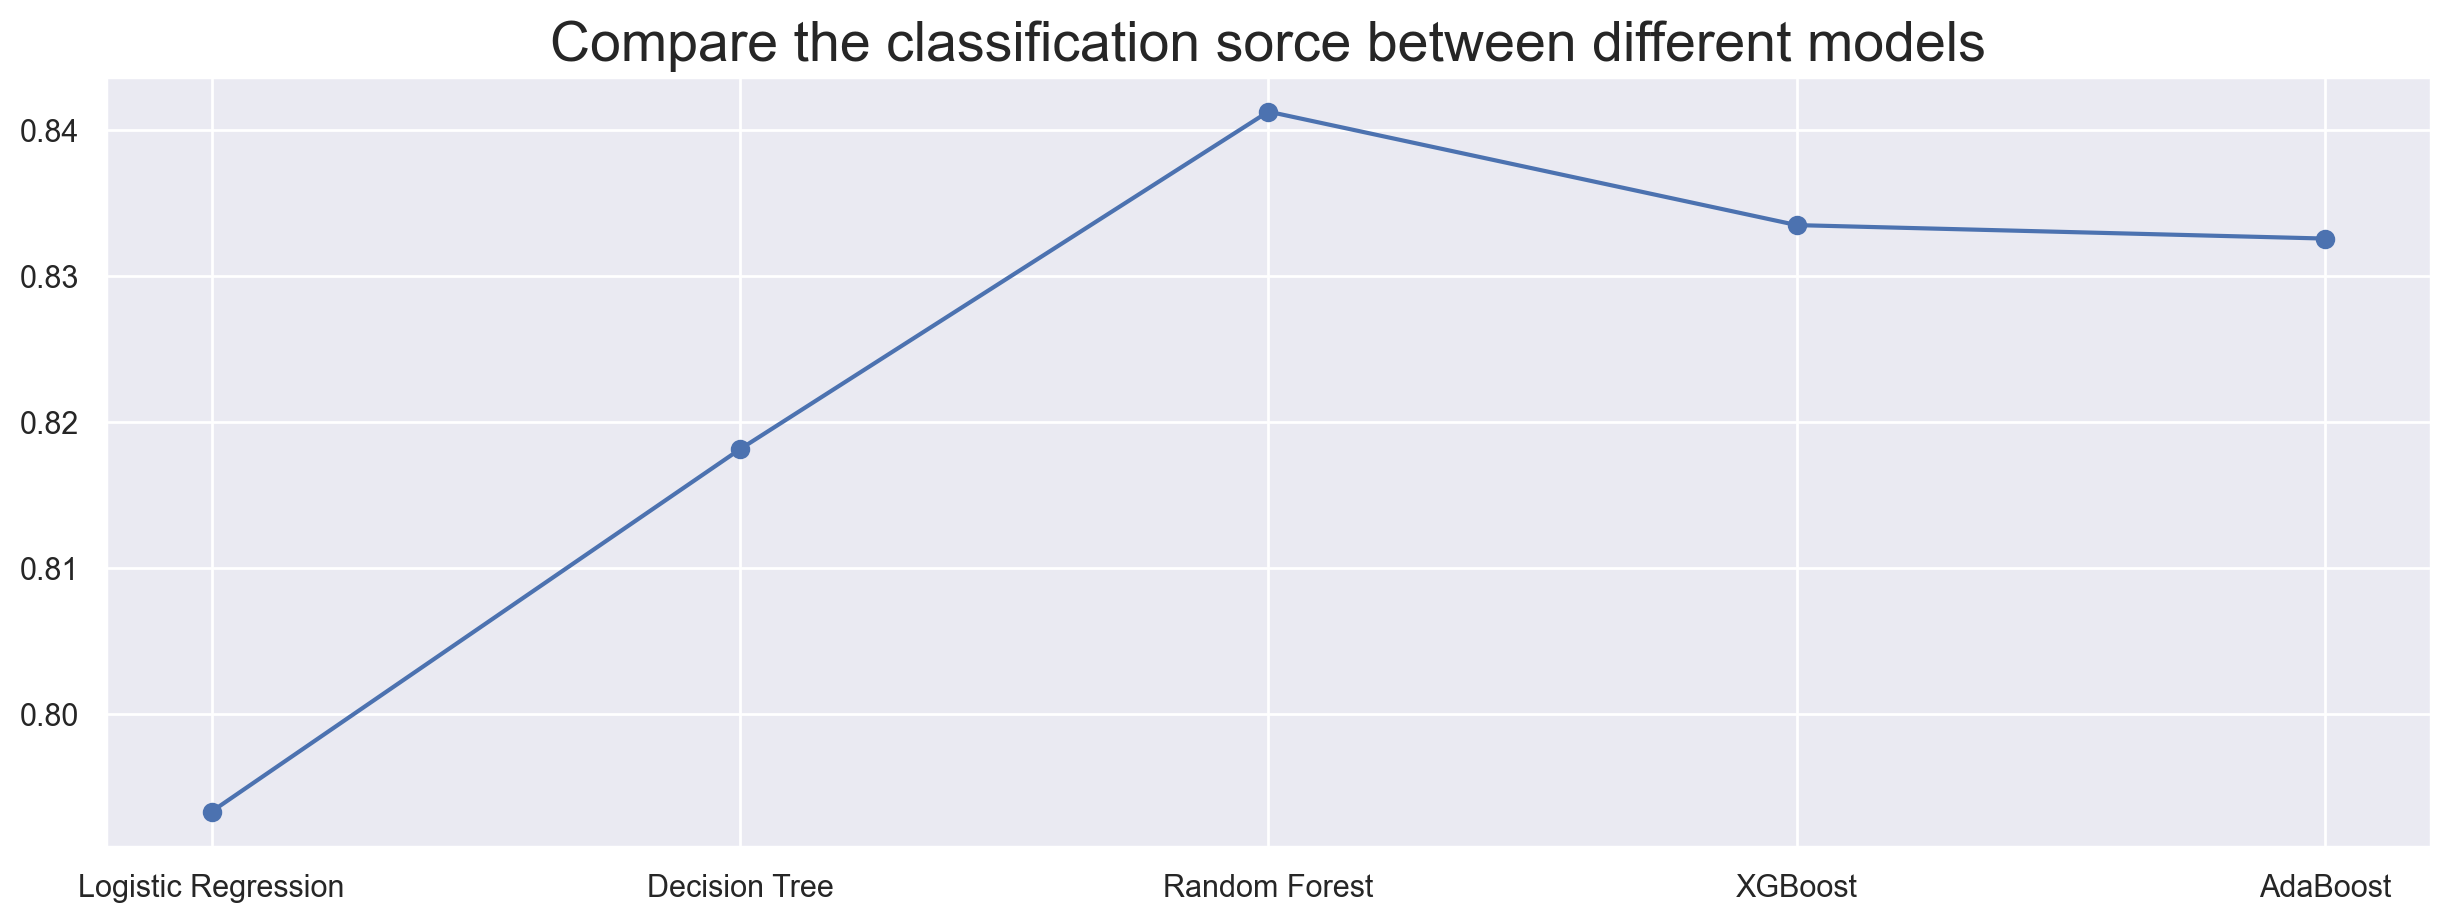

In [44]:
plt.figure(figsize=(15, 5), dpi=200)
plt.plot(model['Model'], model['Score'], marker='o')
plt.title('Compare the classification sorce between different models', fontsize=20)

#### b. 比對不同模型的 F1-score

In [45]:
from sklearn.metrics import f1_score

y_pred_log = log_grid_search_cv.predict(X_test)
f1_log = f1_score(y_test, y_pred_log)

y_pred_tree = tree_grid_search_cv.predict(X_test)
f1_tree = f1_score(y_test, y_pred_tree)

y_pred_rnd = rnd_grid_search_cv.predict(X_test)
f1_rnd = f1_score(y_test, y_pred_rnd)

y_pred_xgb = xgb_grid_search_cv.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb)

y_pred_ada = ada_grid_search_cv.predict(X_test)
f1_ada = f1_score(y_test, y_pred_ada)

In [46]:
model2 = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'F1-score':[f1_log, f1_tree, f1_rnd, f1_xgb, f1_ada]
})
model2.sort_values(by='F1-score', ascending=False)

,Model,F1-score
4,AdaBoost,0.721805
0,Logistic Regression,0.713178
2,Random Forest,0.694915
1,Decision Tree,0.672566
3,XGBoost,0.672566


Text(0.5, 1.0, 'Compare the F1-sorce between different models')

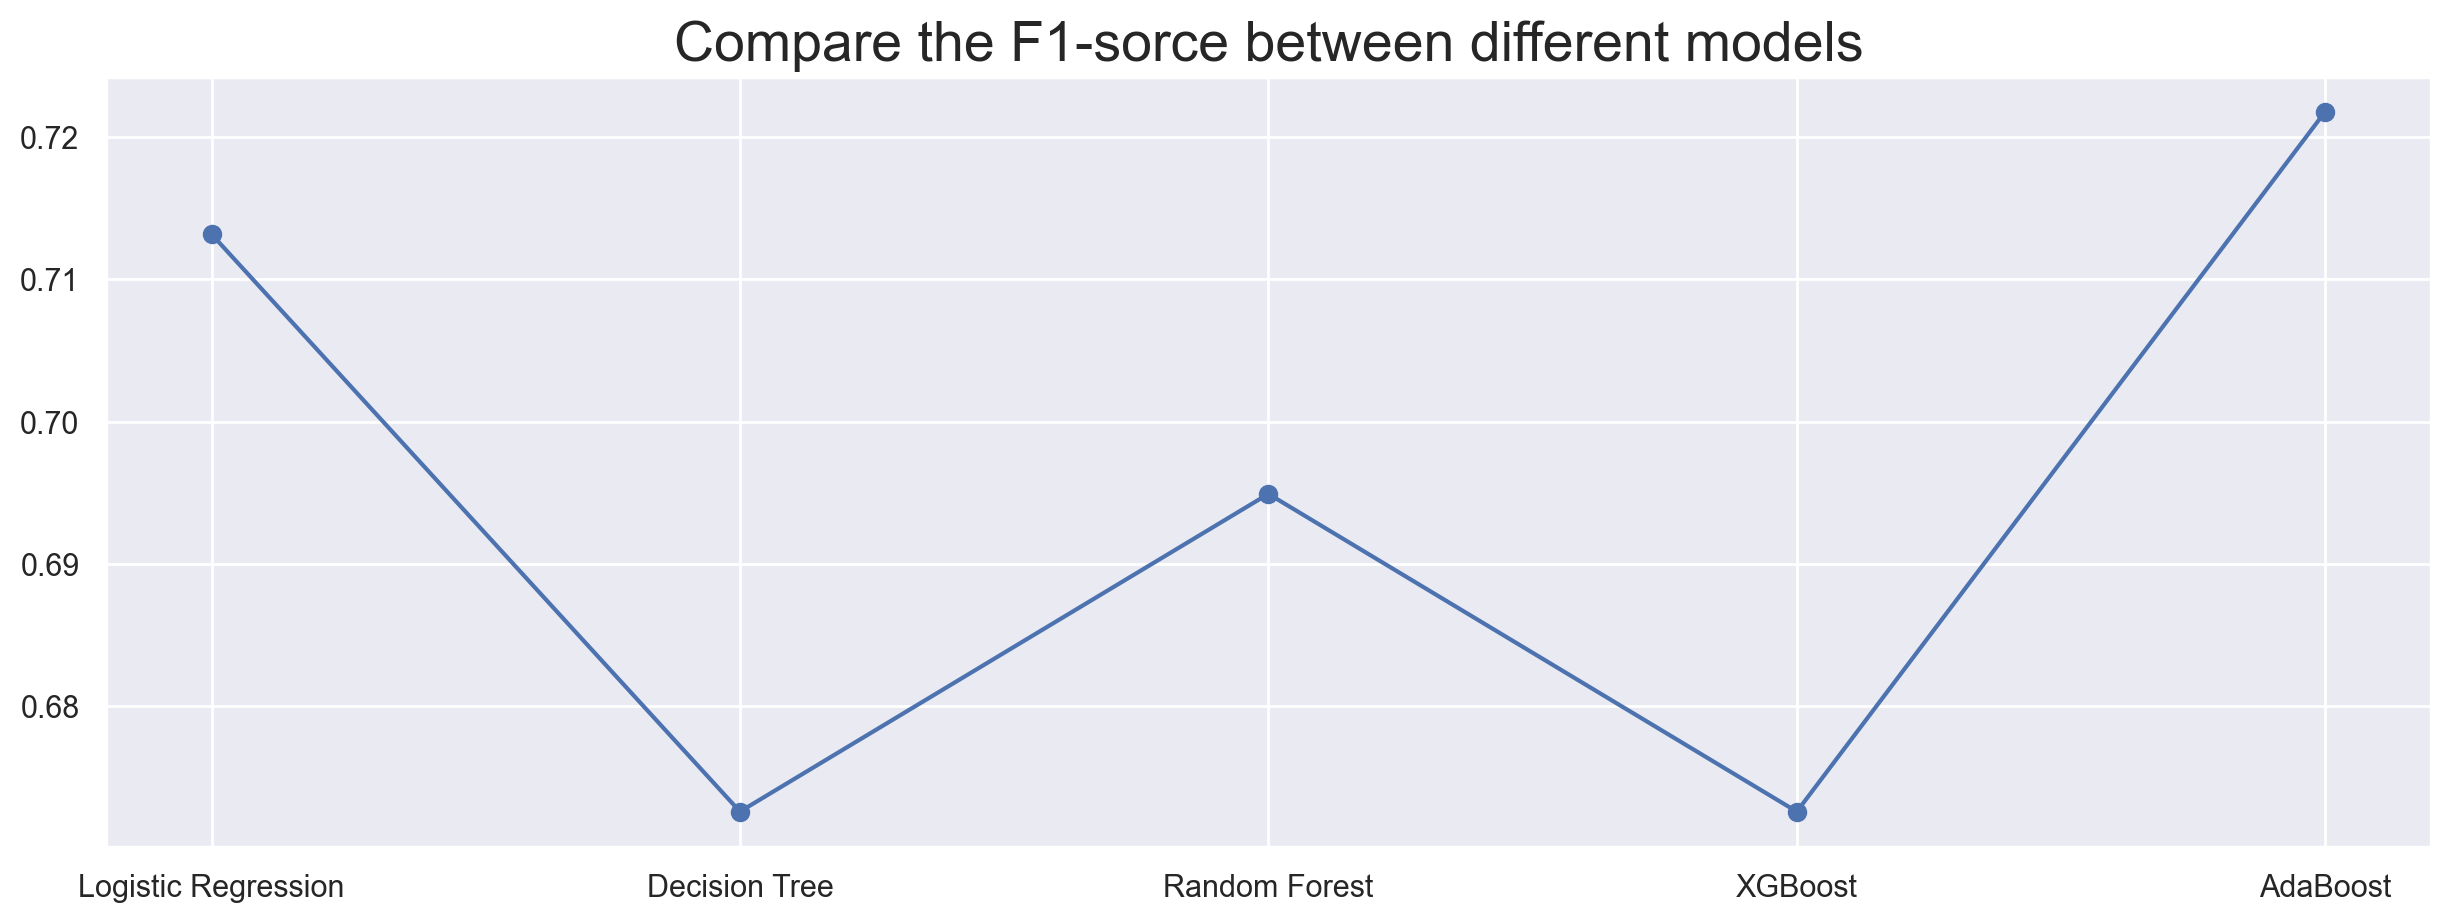

In [47]:
plt.figure(figsize=(15, 5), dpi=200)
plt.plot(model2['Model'], model2['F1-score'], marker='o')
plt.title('Compare the F1-sorce between different models', fontsize=20)

#### c. 比對不同模型的 ROC curve 和 AUC

In [48]:
from sklearn.metrics import roc_curve, auc

log_y_score = log_grid_search_cv.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, thresholds = roc_curve(y_test, log_y_score)

tree_y_score = tree_grid_search_cv.predict_proba(X_test)[:, 1]
tree_fpr, tree_tpr, thresholds = roc_curve(y_test, tree_y_score)

rnd_y_score = rnd_grid_search_cv.predict_proba(X_test)[:, 1]
rnd_fpr, rnd_tpr, thresholds = roc_curve(y_test, rnd_y_score)

xgb_y_score = xgb_grid_search_cv.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb_y_score)

ada_y_score = ada_grid_search_cv.predict_proba(X_test)[:, 1]
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada_y_score)

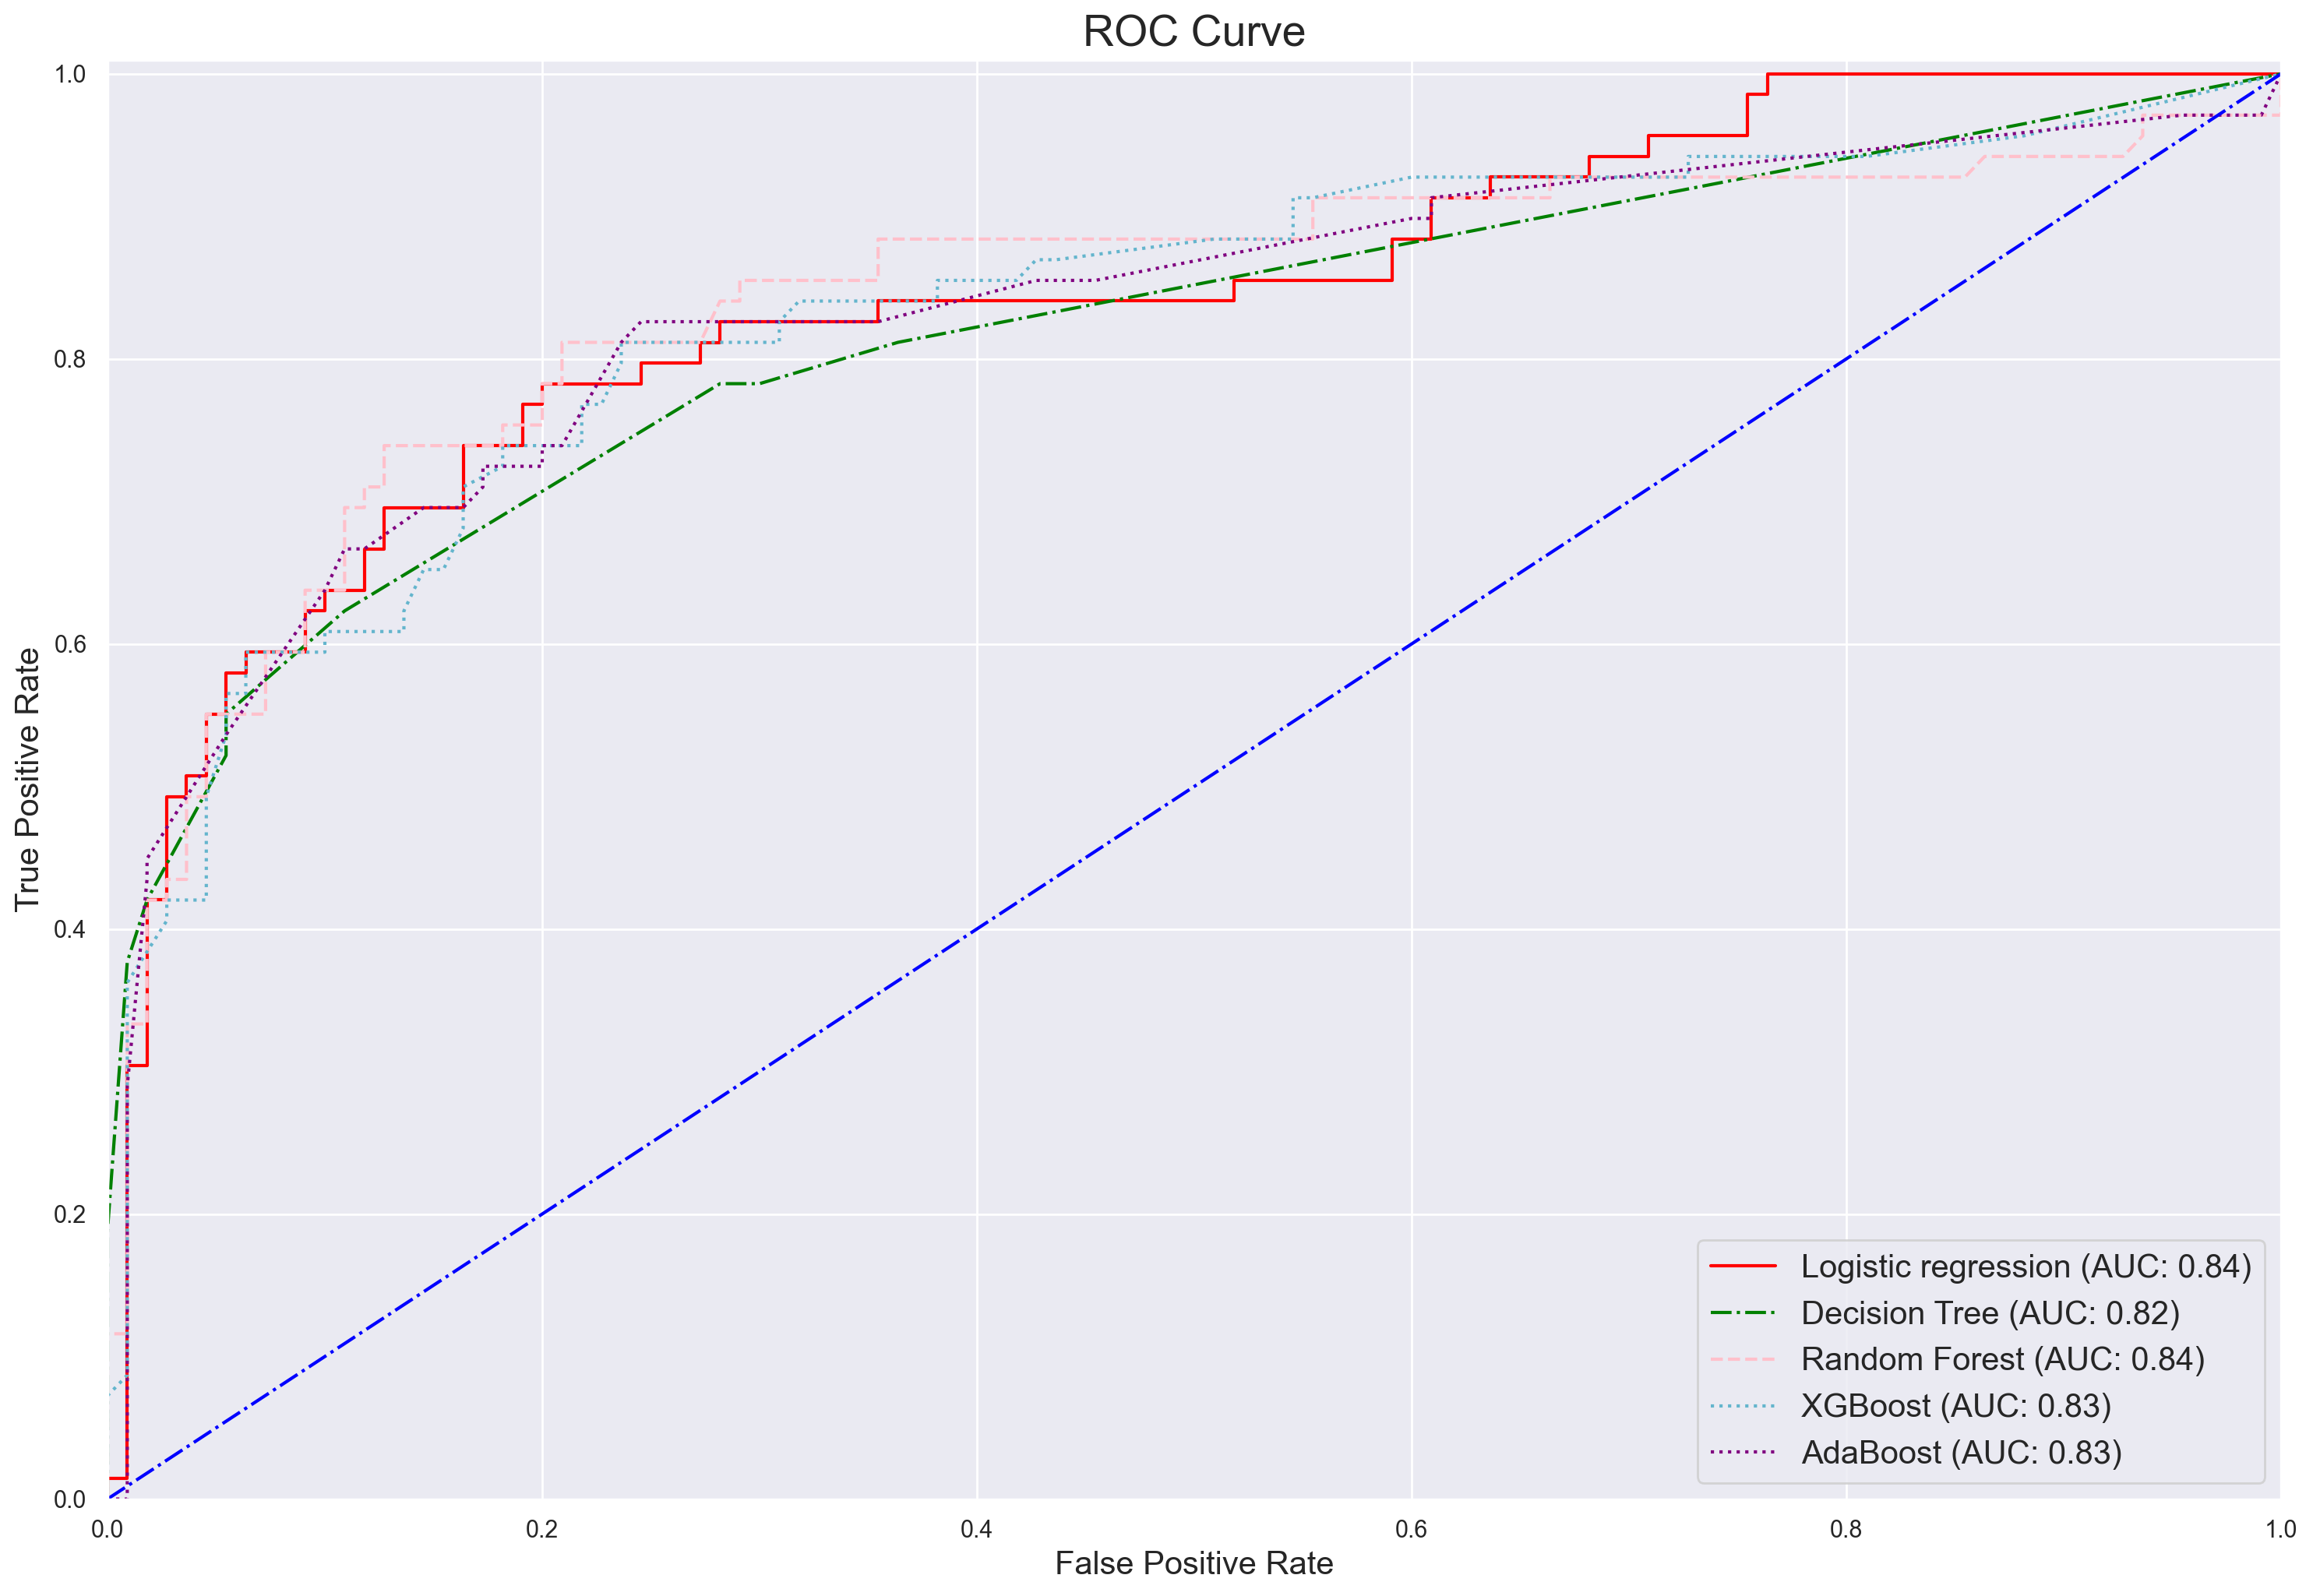

In [49]:
plt.figure(figsize=(18, 12), dpi=200)
plt.plot(log_fpr, log_tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(log_fpr, log_tpr))
plt.plot(tree_fpr, tree_tpr, color='green', linestyle='-.', label='Decision Tree (AUC: %.2f)' % auc(tree_fpr, tree_tpr))
plt.plot(rnd_fpr, rnd_tpr, color='pink', linestyle='--', label='Random Forest (AUC: %.2f)' % auc(rnd_fpr, rnd_tpr))
plt.plot(xgb_fpr, xgb_tpr, color='c', linestyle='dotted', label='XGBoost (AUC: %.2f)' % auc(xgb_fpr, xgb_tpr))
plt.plot(ada_fpr, ada_tpr, color='purple', linestyle=':', label='AdaBoost (AUC: %.2f)' % auc(ada_fpr, ada_tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

### Reference:
   * https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f
   * https://hackmd.io/@Go3PyC86QhypSl7kh5nA2Q/Hk4nXFYkK
   * https://medium.com/jameslearningnote/資料分析-機器學習-第4-1講-kaggle競賽-鐵達尼號生存預測-前16-排名-a8842fea7077
   * https://alankrantas.medium.com/鐵達尼號的悲劇-預測船難生還者的特徵工程筆記-搭配-flaml-自動化建模-以及對-kaggle-競賽的一些觀察-ca3f4b11af34